# Classifying Images of Clothing

We'll build and train a neural network to classify images of clothing, like sneakers and shirts.

It's okay if you don't understand everything. This is a fast-paced overview of a complete TensorFlow program, with explanations along the way. The goal is to get the general sense of a TensorFlow project, not to catch every detail.

This notebook uses tf.keras, a high-level API to build and train models in TensorFlow.

## Install and import dependencies

In [ ]:
!pip install -U tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

2.8.2


In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

## Import the Fashion MNIST dataset

In [ ]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'],dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteDQN59H/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incompleteDQN59H/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress',
               'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('Number of training examples {}'.format(num_train_examples))
print('Number of test examples {}'.format(num_test_examples))

Number of training examples 60000
Number of test examples 10000


## Preprocess the data

In [ ]:
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images = images/255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

### Explore the proprocessed data

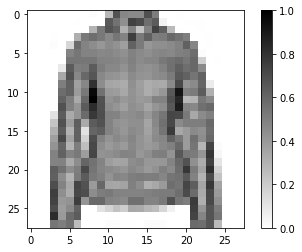

In [ ]:
for image, label in test_dataset.take(1):
    break
image = image.numpy().reshape([28,28])

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

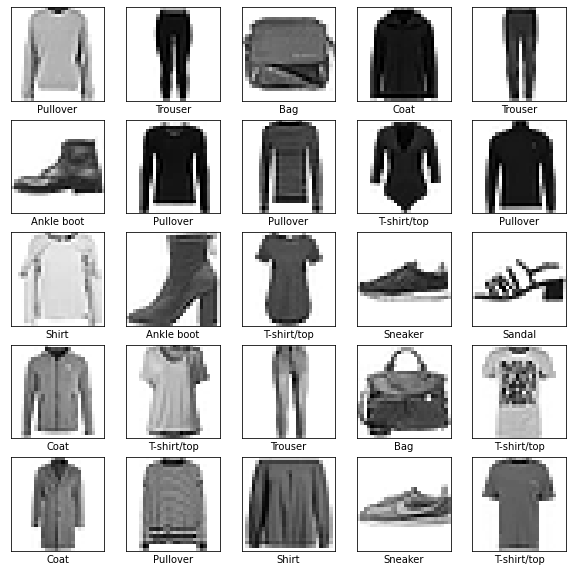

In [ ]:
plt.figure(figsize=(10,10))

for i,(image, label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape([28,28])
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])

plt.show()

## Build the model
Building the neural network requires configuring the layers of the model, then compiling the model.

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28,1)),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                             ])

### Compile the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
batch_size = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

In [ ]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/batch_size))

Epoch 1/5
1875/1875 [==============================] - 14s 4ms/step - loss: 0.4986 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3736 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3339 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3112 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2910 - accuracy: 0.8929


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/batch_size))

313/313 [==============================] - 1s 4ms/step - loss: 0.3672 - accuracy: 0.8727


## Make predictions

In [ ]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)

In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([3.3445467e-05, 1.2959481e-07, 1.4102545e-02, 5.5727219e-07,
       9.8132175e-01, 8.9332444e-09, 4.5266869e-03, 4.9147097e-08,
       1.4906630e-05, 3.3202727e-09], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels[0]

4

Let's look at 10 images predictions.

In [ ]:
def plot_images(i, prediction_array, true_label, image):
    prediction_array, true_label, img = prediction_array[i], true_label[i], image[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[...,0], cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction_array)

    if predicted_label == true_label:
        color='blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(prediction_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, prediction_array, true_label):
    prediction_array, true_label = prediction_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(prediction_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

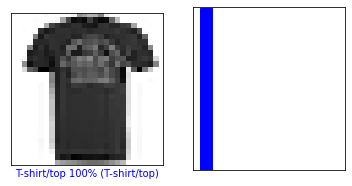

In [ ]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

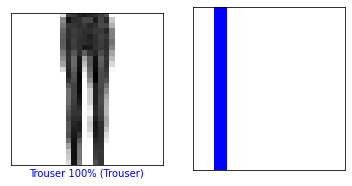

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_images(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

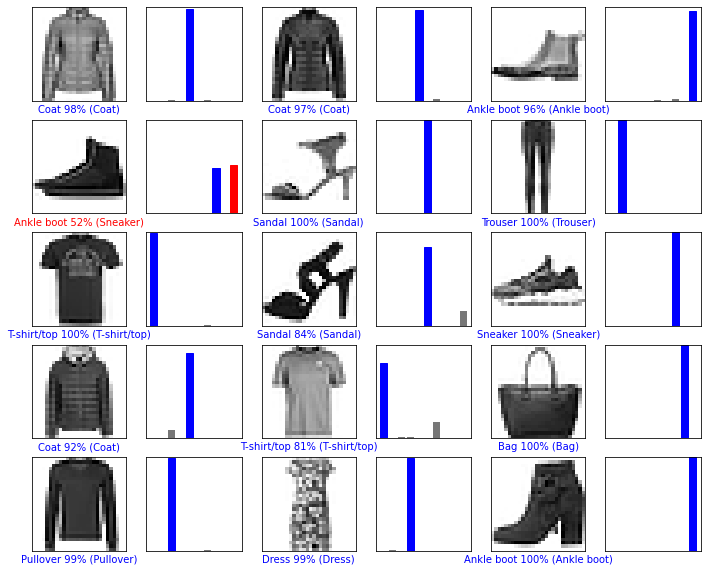

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_images(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [ ]:
image = test_images[0]

In [ ]:
image = np.array([image])

print(image.shape)

(1, 28, 28, 1)


In [ ]:
predictions_single = model.predict(image)

print(predictions_single)

[[3.3445467e-05 1.2959481e-07 1.4102552e-02 5.5727321e-07 9.8132175e-01
  8.9332444e-09 4.5266892e-03 4.9147097e-08 1.4906644e-05 3.3202792e-09]]


In [ ]:
test_labels[0]

4

In [ ]:
np.argmax(predictions_single[0])

4

Model correctly classifies coat (a label of 4).